# Ciclo 02 - K Nearest Neighbor (KNN) Exercicios

# 1. Rafaça o código de treinamento da aula 12: “K-Nearest Neighbors - Prática” no seu computador usando o Jupyter Notebook ou o Google Colabs.

### 0.0 Imports

In [51]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics as mt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import display, Math, Latex


In [52]:
df = pd.read_csv('train.csv')

In [53]:
df.head(5)

,id_cliente,idade,saldo_atual,divida_atual,renda_anual,valor_em_investimentos,taxa_utilizacao_credito,num_emprestimos,num_contas_bancarias,num_cartoes_credito,dias_atraso_dt_venc,num_pgtos_atrasados,num_consultas_credito,taxa_juros,investe_exterior,pessoa_polit_exp,limite_adicional
0,1767,21,278.172008,2577.05,24196.89636,104.306544,31.038763,6,5,7,21,14,9,15,Não,Não,Negar
1,11920,40,268.874152,2465.39,19227.37796,69.858778,36.917093,5,8,5,40,23,10,18,Não,Não,Negar
2,8910,36,446.643127,1055.29,42822.28223,134.201478,34.561714,0,3,6,26,13,3,15,Sim,Não,Negar
3,4964,58,321.141267,703.05,51786.82600,297.350067,31.493561,0,3,7,12,7,2,1,Sim,Não,Negar
4,10100,35,428.716114,891.29,44626.85346,134.201478,28.028887,2,8,7,24,10,8,20,Sim,Não,Negar


### 1.0 Seleção de Feature

In [4]:
# separa as features relevantes
features = ['idade', 'saldo_atual', 'divida_atual', 'renda_anual', 'valor_em_investimentos',
            'taxa_utilizacao_credito', 'num_emprestimos', 'num_contas_bancarias', 'num_cartoes_credito',
            'dias_atraso_dt_venc', 'num_pgtos_atrasados', 'num_consultas_credito', 'taxa_juros']

# separa a feature de classificação
label = ['limite_adicional']

### 1.1 Preparação dos dados para treino

In [5]:
x_train = df.loc[:, features]
y_train = df.loc[:, label].values.ravel()

### 1.2 Treinamento do algoritmo KNN

In [6]:
knn_classifier = KNeighborsClassifier( n_neighbors = 8 )
knn_classifier.fit( x_train, y_train )

KNeighborsClassifier(n_neighbors=8)

### 1.3 Previsão das observações

In [7]:
y_pred = knn_classifier.predict( x_train )

### 1.4 Comparação do Previsto com o Realizado


In [8]:
df1 = df.loc[:, ['id_cliente', 'limite_adicional']]
df1['predicted'] = y_pred

In [9]:
df1

,id_cliente,limite_adicional,predicted
0,1767,Negar,Negar
1,11920,Negar,Negar
2,8910,Negar,Negar
3,4964,Negar,Negar
4,10100,Negar,Negar
...,...,...,...
9495,5155,Negar,Negar
9496,11977,Negar,Conceder
9497,9278,Negar,Negar
9498,2525,Negar,Negar


### 1.5 Matriz de Confusão e Acurácia

In [10]:
matrix = mt.confusion_matrix(y_train, y_pred)

In [11]:
matrix_display = mt.ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels = ['Negar', 'Conceder'])

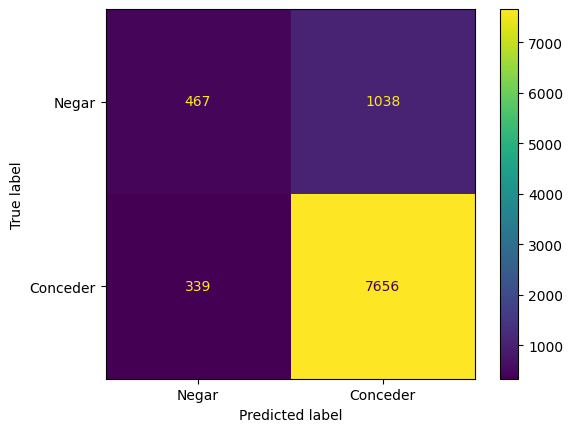

In [12]:
matrix_display.plot()
plt.show()


In [13]:
mt.accuracy_score(y_train, y_pred)

0.8550526315789474

### 1.6 Precisão e Recall 

In [14]:
mt.precision_score( y_train, y_pred, average="binary", pos_label='Conceder' )

0.5794044665012407

In [15]:
mt.recall_score( y_train, y_pred, average='binary', pos_label='Conceder' )

0.3102990033222591

# 2. Retreino o algoritmo com os seguintes valores para K: [3, 5, 7, 9, 11, 13, 15, 17, 19 e 21] e anote a acurácia.

In [46]:
knn_classifier = KNeighborsClassifier( n_neighbors = 21 )
knn_classifier.fit( x_train, y_train )
y_pred = knn_classifier.predict( x_train )
accuracy = mt.accuracy_score( y_train, y_pred )
accuracy

0.8462105263157895

K Number: 3  ---   Accuracy: 0.8854736842105263 

K Number: 5  ---   Accuracy: 0.8667368421052631 

K Number: 7  ---   Accuracy: 0.8590526315789474 

K Number: 9  ---   Accuracy: 0.8528421052631578 

K Number: 11  ---   Accuracy: 0.85 

K Number: 13  ---   Accuracy: 0.8492631578947368 

K Number: 15  ---   Accuracy: 0.848 

K Number: 17  ---   Accuracy: 0.8478947368421053 

K Number: 19  ---   Accuracy: 0.8478947368421053 

K Number: 21  ---   Accuracy: 0.8462105263157895 

# 3. Qual o problema principal de usar a métrica acurácia? Escreve um exemplo hipotético, no qual o problema acontece.

A acurácia é uma métrica bastante utilizada. Porém há algumas situações em que ela não vai corresponder ao problema modelado.

Em problemas onde temos classes desbalanceadas como por exemplo, identificação de fraudes em cartões de crédito, o número de casos onde é fraude costuma ser bem menor em relação ao número de não fraudes. Vamos supor que tenhamos 99800 casos onde não ocorreram fraudes e 200 casos de fraudes. 

Se criassemos um modelo onde todos os casos fossem considerados não fraudes teriamos uma acurácia de 99,8%, e acabariamos validando o modelo como otimo sendo que nenhuma fraude foi detectada.

# 4. Explique com um pequeno texto ilustrando a diferença entre a métrica de Precision e Recall e mostrando quando usa deve ser escolhida em relação a outra.

In [49]:
display(Math(r'\large Precision = \frac {TP}{TP + FP}'))

<IPython.core.display.Math object>

A precisão é usada em situações em que os falsos positivos prejudicam mais que os falsos negativos.

Quando classificamos um investimento como um bom investimento, precisamos estar corretos, pois é melhor classificarmos um investimento bom como um investimento ruim ( falso negativo ) e não investirmos, do que classificar um investimento ruim como bom e investirmos, e perdermos dinheiro no processo.

Nesse caso precisamos de um modelo que seja preciso em suas classificações, para não cairmos em investimentos ruins que sejam classificados como bons.

In [50]:
display(Math(r'\large Recall = \frac {TP}{TP + FN}'))

<IPython.core.display.Math object>

O recall é utilizado em situações onde os falsos negativos são considerados mais prejudiciais que os falsos positivos.

Vamos supor que estamos desenvolvendo um modelo que classifica pacientes doentes, é melhor que ele classifique um paciente saudavel como doente( falso positivo ), do que ele classificar um paciente como saudavel sendo que eles esta doente, já que nesse caso estariamos cometendo um erro que pode custar vidas.

# 5. Escreve um trecho de código que automatize o treinamento do algoritmo KNN, a fim de encontrar o melhor valor para K, do exercício 2.

In [68]:
np.arange(3, 22, 2) # criando a lista com np - somente para facilitar

array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21])

In [25]:
k_list = np.arange(3, 22, 2)
accuracy_list = []

for i in k:
    print(f'K Number: {i}')
    knn_classifier = KNeighborsClassifier( n_neighbors = i )
    knn_classifier.fit( x_train, y_train )
    y_pred = knn_classifier.predict( x_train )
    accuracy = mt.accuracy_score( y_train, y_pred )
    print(f'Accuracy: {accuracy} \n')
    accuracy_list.append(accuracy)

K Number: 3
Accuracy: 0.8854736842105263 

K Number: 5
Accuracy: 0.8667368421052631 

K Number: 7
Accuracy: 0.8590526315789474 

K Number: 9
Accuracy: 0.8528421052631578 

K Number: 11
Accuracy: 0.85 

K Number: 13
Accuracy: 0.8492631578947368 

K Number: 15
Accuracy: 0.848 

K Number: 17
Accuracy: 0.8478947368421053 

K Number: 19
Accuracy: 0.8478947368421053 

K Number: 21
Accuracy: 0.8462105263157895 



In [28]:
k_accuracy = { 'k': k_list, 'accuracy': accuracy_list}

In [30]:
k_accuracy_dataframe = pd.DataFrame(k_accuracy)
k_accuracy_dataframe

,k,accuracy
0,3,0.885474
1,5,0.866737
2,7,0.859053
3,9,0.852842
4,11,0.850000
5,13,0.849263
6,15,0.848000
7,17,0.847895
8,19,0.847895
9,21,0.846211


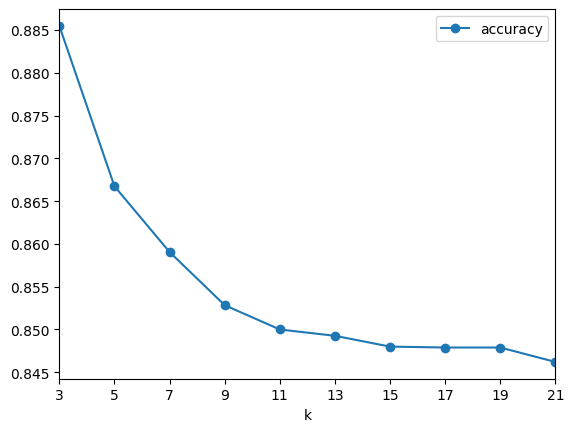

In [43]:
fig, ax = plt.subplots()
k_accuracy_dataframe.plot(x="k", y="accuracy", marker="o", ax=ax)
ax.set_xlim(3,21)
ax.set_xticks(np.arange(3, 22, 2));

# 6. Escreva um pequeno texto, explicando as 6 denominações da matriz de confusão: P, N, TP, FN, FP e TN

P = Classe Positiva

N = Classe Negativa

True Positive = Classificação correta da classe positiva

True Negative = Classificação correta da classe negativa

False Positive = Classificação errada da classe positiva

False Negative = Classificação errada da classe negativa


# 7. No conjunto de dados usado na aula 12: “K-Nearest Neighbors - Prática”, existe alguma variável que fere as premissas do K-NN? Se sim ou não, explique.

A coluna id_cliente como um recurso não faz sentido, porque o modelo tratará o id como um valor numérico que diminuirá o desempenho do modelo, porque não há conexão entre o valor do id com se ele recebera o limite adicional ou não.

In [ ]:
# Criar e treinar o modelo KNN
k = 2  # Número de vizinhos
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train, y_train)

# Fazer previsões nos dados de treinamento (isso é apenas para demonstração do método predict)
y_pred = knn_classifier.predict(X_train)
print("Previsões nos dados de treinamento:", y_pred)